Explore various output diagnostics from ESM4 pre-industrial control run

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir = 'ocean_cobalt_omip_tracers_month_z/av/monthly_5yr/'
filename = 'ocean_cobalt_omip_tracers_month_z.0866-0870.12.nc'
ds = xr.open_dataset(rootdir+datadir+filename)
print(ds)

<xarray.Dataset>
Dimensions:             (nv: 2, time: 1, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * xh                  (xh) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * yh                  (yh) float64 -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * z_l                 (z_l) float64 2.5 10.0 20.0 ... 5.5e+03 6e+03 6.5e+03
  * z_i                 (z_i) float64 0.0 5.0 15.0 ... 6.25e+03 6.75e+03
  * time                (time) object 0870-12-16 12:00:00
  * nv                  (nv) float64 1.0 2.0
Data variables:
    volcello            (time, z_l, yh, xh) float32 ...
    dissic              (time, z_l, yh, xh) float32 ...
    dissoc              (time, z_l, yh, xh) float32 ...
    phyc                (time, z_l, yh, xh) float32 ...
    zooc                (time, z_l, yh, xh) float32 ...
    phydiat             (time, z_l, yh, xh) float32 ...
    phydiaz             (time, z_l, yh, xh) float32 ...
    phypico             (time, z_l, yh, xh) float32 ...
    phymisc    

/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/xarray/coding/times.py:122: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)


In [3]:
print(ds.phyc)

<xarray.DataArray 'phyc' (time: 1, z_l: 35, yh: 576, xh: 720)>
[14515200 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time     (time) object 0870-12-16 12:00:00
Attributes:
    long_name:      Phytoplankton Carbon Concentration
    units:          mol m-3
    cell_measures:  volume: volcello area: areacello
    standard_name:  mole_concentration_of_phytoplankton_expressed_as_carbon_i...
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean within mont...
    time_avg_info:  average_T1,average_T2,average_DT


# Temperature and salinity surface forcing

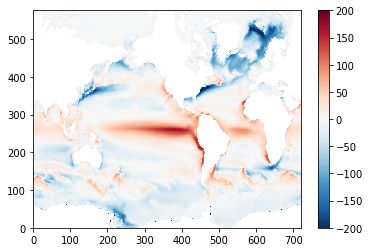

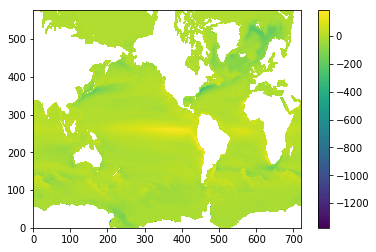

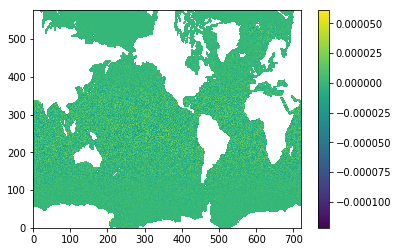

In [38]:
# Net heat from atmospheric coupler (SW, LW, sensible, latent)
im = plt.pcolormesh(ds.net_heat_coupler.isel(time=0),cmap="RdBu_r")
plt.colorbar(im)
plt.clim([-200,200])
plt.show()
# Sum of individual heat fluxes
hf=ds.rlntds+ds.rsntds+ds.hfsso+ds.hflso
im = plt.pcolormesh(hf.isel(time=0))
plt.colorbar(im)
plt.show()
# Difference
im = plt.pcolormesh(ds.net_heat_coupler.isel(time=0)-hf.isel(time=0))
plt.colorbar(im)
plt.show()

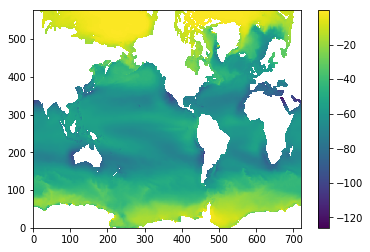

In [29]:
# Longwave at ocean surface
im = plt.pcolormesh(ds.rlntds.isel(time=0))
plt.colorbar(im)
plt.show()

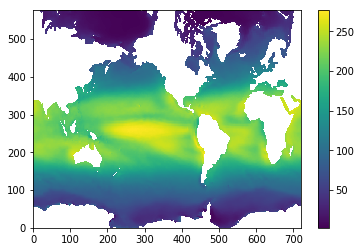

In [30]:
# Shortwave at cell upper interfaces (3D distribution)
im = plt.pcolormesh(ds.rsdo.isel(zi=0,time=0))
plt.colorbar(im)
plt.show()

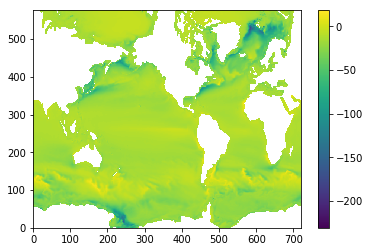

In [31]:
# Sensible at ocean surface
im = plt.pcolormesh(ds.hfsso.isel(time=0))
plt.colorbar(im)
plt.show()

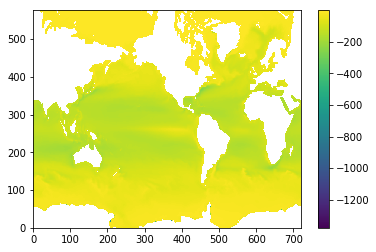

In [32]:
# Latent at ocean surface
im = plt.pcolormesh(ds.hflso.isel(time=0))
plt.colorbar(im)
plt.show()

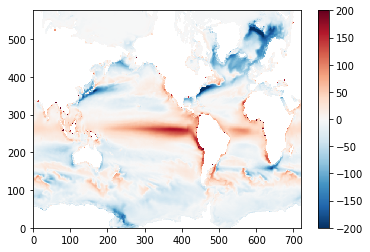

In [39]:
# Total heat flux at surface
im = plt.pcolormesh(ds.hfds.isel(time=0),cmap='RdBu_r')
plt.colorbar(im)
plt.clim([-200,200])
plt.show()